In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df5 = pd.read_csv("noshock-5.csv")
df60 = pd.read_csv("noshock-60.csv")
df = pd.concat([df5, df60], ignore_index=True)

df_pop = pd.read_csv("pop.csv")

df_veh = pd.read_csv("veh-reg.csv")

In [3]:
df.head()

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_id,metric_name,val,upper,lower
0,1,Global,1,male,1,Under 5,1950,33,Probability of death no-shock with hiv,8,Probability of death,0.211479,0.233700,0.191125
1,1,Global,1,male,1,Under 5,1951,33,Probability of death no-shock with hiv,8,Probability of death,0.208153,0.230490,0.189132
2,1,Global,1,male,1,Under 5,1952,33,Probability of death no-shock with hiv,8,Probability of death,0.203444,0.224038,0.184705
3,1,Global,1,male,1,Under 5,1953,33,Probability of death no-shock with hiv,8,Probability of death,0.199828,0.219155,0.181873
4,1,Global,1,male,1,Under 5,1954,33,Probability of death no-shock with hiv,8,Probability of death,0.196090,0.214379,0.178952


In [4]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208,55434,56234,56699,57029,57357,...,102050,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,532760424,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,30117411,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,360285439,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,...,24220660,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [5]:
df_veh.head()

,Country,Year,Data Source,Number of registered vehicles
0,Afghanistan,2013,RS_001,655357
1,Albania,2016,RS_002,563106
2,Antigua and Barbuda,2016,RS_003,36030
3,Argentina,2016,RS_004,21633587
4,Australia,2016,RS_005,18326236


In [6]:
# find all countries in df_pop that aren't in deaths dfs
not_in = []
for country in df_pop["Country Name"]:
    if country not in df["location_name"].unique():
        not_in.append(country)
        
print(not_in)
print(len(df_pop))
print(len(not_in))

['Aruba', 'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Central Europe and the Baltics', 'Channel Islands', 'Caribbean small states', 'Curacao', 'Cayman Islands', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Euro area', 'Fragile and conflict affected situations', 'Faroe Islands', 'Gibraltar', 'High income', 'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Isle of Man', 'Kyrgyz Republic', 'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low income', 'Liechtenstein', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 'Macao SAR, China', 'St. Martin (French part)', 'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (

In [7]:
# find all countries in df_pop that aren't in df_veh
not_in = []
for country in df_pop["Country Name"]:
    if country not in df_veh["Country"].unique():
        not_in.append(country)
        
print(not_in)
print(len(df_pop))
print(len(not_in))

['Aruba', 'Africa Eastern and Southern', 'Africa Western and Central', 'Angola', 'Andorra', 'Arab World', 'Armenia', 'American Samoa', 'Bahrain', 'Bahamas', 'Bermuda', 'Brunei Darussalam', 'Central Europe and the Baltics', 'Channel Islands', 'Democratic Republic of the Congo', 'Congo', 'Caribbean small states', 'Curacao', 'Cayman Islands', 'Djibouti', 'Algeria', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Euro area', 'European Union', 'Fragile and conflict affected situations', 'Faroe Islands', 'Gabon', 'Gibraltar', 'Greenland', 'Guam', 'High income', 'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)', 'Haiti', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Isle of Man', 'Kyrgyz Republic', 'Saint Kitts and Nevis', 'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean', 'Least developed countri

In [8]:
# find all countries in df_veh that aren't in deaths dfs
not_in = []
for country in df_veh["Country"]:
    if country not in df["location_name"].unique():
        not_in.append(country)
        
print(not_in)
print(len(df_veh))
print(len(not_in))

['occupied Palestinian territory, including east Jerusalem']
162
1


In [9]:
# get all countries that are in all of the datasets
countries = []
for country in df["location_name"].unique():
    if (country in df_pop["Country Name"].unique() and 
            country in df_veh["Country"].unique()):
        countries.append(country)

print(len(countries))
print(countries)

159
['China', 'Cambodia', 'Indonesia', "Lao People's Democratic Republic", 'Malaysia', 'Maldives', 'Myanmar', 'Philippines', 'Sri Lanka', 'Thailand', 'Timor-Leste', 'Viet Nam', 'Fiji', 'Kiribati', 'Micronesia (Federated States of)', 'Papua New Guinea', 'Samoa', 'Tonga', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Mongolia', 'Tajikistan', 'Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Hungary', 'North Macedonia', 'Montenegro', 'Poland', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Belarus', 'Estonia', 'Latvia', 'Lithuania', 'Republic of Moldova', 'Russian Federation', 'Ukraine', 'Japan', 'Republic of Korea', 'Singapore', 'Australia', 'New Zealand', 'Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Argentina', 'Chile', 'Uruguay', 'Canada', 'United States of America', 'Antigua and 

In [10]:
year = 1950
sex = "both"
location = "Zimbabwe"
age_group = 199

for year in range(1950, 2020):
    print(year)
    print(float(df[(df["age_group_id"] == age_group) &(df["location_name"] == location) & 
                   (df["sex_name"] == sex) & (df["year_id"] == year)]["val"]))
    print()

1950
0.3758452625927

1951
0.373805379702116

1952
0.372102298390003

1953
0.369422639238542

1954
0.36835172521994

1955
0.366788950701704

1956
0.364276671331106

1957
0.361851751064533

1958
0.360096550421455

1959
0.357684776083154

1960
0.354968587332285

1961
0.352120267466452

1962
0.350059688089782

1963
0.348824061681618

1964
0.346566764808922

1965
0.344326544857409

1966
0.34235032057586

1967
0.339939542674616

1968
0.338169206583105

1969
0.334874114906618

1970
0.330491518678921

1971
0.326327902364333

1972
0.321702112392104

1973
0.317215980393211

1974
0.31257372269665

1975
0.308734151200565

1976
0.305937530670459

1977
0.304256912122611

1978
0.30190697029377

1979
0.299236113111145

1980
0.294227983446208

1981
0.283834500604925

1982
0.276207163982823

1983
0.268921351974853

1984
0.26217556982265

1985
0.255470412291793

1986
0.249543098979514

1987
0.247888765731279

1988
0.25349285962496

1989
0.265178223002129

1990
0.286352671715874

1991
0.311260960784949



(array([ 0.,  0., 16., 20., 12., 18., 15., 21., 15.,  4.,  9.,  6.,  9.,
         3.,  2.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  0.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 ]),
 <BarContainer object of 25 artists>)

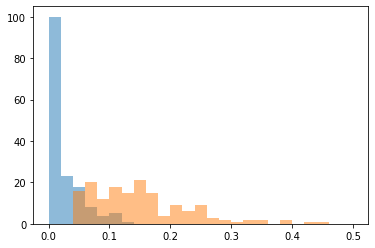

In [11]:
# histogram of death rates in 2019
death_rates_young = np.array(df[(df["location_name"].isin(countries)) & (df["age_group_id"] == 1) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

death_rates_old = np.array(df[(df["location_name"].isin(countries)) & (df["age_group_id"] == 199) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

plt.hist(death_rates_young, alpha=0.5, range=(0,0.5), bins=25)
plt.hist(death_rates_old, alpha=0.5, range=(0,0.5), bins=25)

In [12]:
veh_reg_rates = np.zeros(len(countries))
death_rates_young = np.zeros(len(countries))
death_rates_old = np.zeros(len(countries))

for i, country in enumerate(countries):
    
    veh_reg_rates[i] = (float(df_veh[df_veh["Country"] == country]["Number of registered vehicles"]) / 
                     float(df_pop[df_pop["Country Name"] == country]["2016"]))
    
    death_rates_young[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 1) &
               (df["sex_name"] == "both") & (df["year_id"] == 2016)]["val"])
    
    death_rates_old[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 199) &
               (df["sex_name"] == "both") & (df["year_id"] == 2016)]["val"])

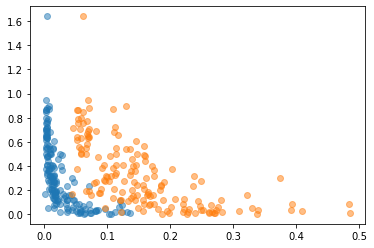

In [13]:
plt.scatter(death_rates_young, veh_reg_rates, alpha=0.5)
plt.scatter(death_rates_old, veh_reg_rates, alpha=0.5)
plt.show()

In [14]:
print(np.where(veh_reg_rates > 1.5))
print(np.where(death_rates_old > 0.3))

(array([156]),)
(array([ 13,  14, 120, 124, 129, 132, 135, 136, 137, 138, 141, 148]),)


In [15]:
print(countries[154])

num = 133
print(countries[num])
print(death_rates_old[num])
print(veh_reg_rates[num])

Senegal
United Republic of Tanzania
0.229573886007868
0.04078519064677865


In [16]:
usa = np.where(np.array(countries) == "United States of America")[0]
neth = np.where(np.array(countries) == "Netherlands")[0]

print(death_rates_old[usa])
print(veh_reg_rates[usa])
print()
print(death_rates_old[neth])
print(veh_reg_rates[neth])

[0.10955012]
[0.87074293]

[0.05817682]
[0.63167684]


In [28]:
# https://en.wikipedia.org/wiki/Social_Progress_Index
# Social progress index

high_spis = np.zeros(30, dtype=int)
high_spis[0] = np.where(np.array(countries) == "Norway")[0]
high_spis[1] = np.where(np.array(countries) == "Denmark")[0]
high_spis[2] = np.where(np.array(countries) == "Finland")[0]
high_spis[3] = np.where(np.array(countries) == "New Zealand")[0]
high_spis[4] = np.where(np.array(countries) == "Sweden")[0]
high_spis[5] = np.where(np.array(countries) == "Switzerland")[0]
high_spis[6] = np.where(np.array(countries) == "Canada")[0]
high_spis[7] = np.where(np.array(countries) == "Australia")[0]
high_spis[8] = np.where(np.array(countries) == "Iceland")[0]
high_spis[9] = np.where(np.array(countries) == "Netherlands")[0]
high_spis[10] = np.where(np.array(countries) == "Germany")[0]
high_spis[11] = np.where(np.array(countries) == "Ireland")[0]
high_spis[12] = np.where(np.array(countries) == "Japan")[0]
high_spis[13] = np.where(np.array(countries) == "Luxembourg")[0]
high_spis[14] = np.where(np.array(countries) == "Austria")[0]
high_spis[15] = np.where(np.array(countries) == "Belgium")[0]
high_spis[16] = np.where(np.array(countries) == "Republic of Korea")[0]
high_spis[17] = np.where(np.array(countries) == "France")[0]
high_spis[18] = np.where(np.array(countries) == "Spain")[0]
high_spis[19] = np.where(np.array(countries) == "United Kingdom")[0]
high_spis[20] = np.where(np.array(countries) == "Portugal")[0]
high_spis[21] = np.where(np.array(countries) == "Slovenia")[0]
high_spis[22] = np.where(np.array(countries) == "Italy")[0]
high_spis[23] = np.where(np.array(countries) == "Estonia")[0]
high_spis[24] = np.where(np.array(countries) == "Czechia")[0]
high_spis[25] = np.where(np.array(countries) == "Cyprus")[0]
high_spis[26] = np.where(np.array(countries) == "Greece")[0]
high_spis[27] = np.where(np.array(countries) == "United States of America")[0]
high_spis[28] = np.where(np.array(countries) == "Singapore")[0]
high_spis[29] = np.where(np.array(countries) == "Malta")[0]

print(high_spis)

[63 51 52 47 66 67 72 46 56 62 54 57 43 60 48 49 44 53 65 68 64 35 59 37
 27 50 55 73 45 61]


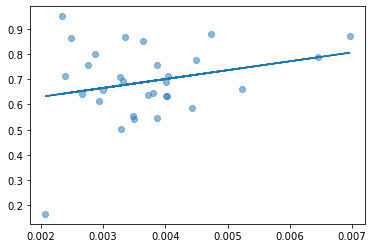

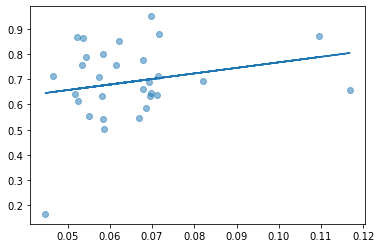

35.219287260067745


In [41]:
plt.scatter(death_rates_young[high_spis], veh_reg_rates[high_spis], alpha=0.5)
m, b = np.polyfit(death_rates_young[high_spis], veh_reg_rates[high_spis], 1)
plt.plot(death_rates_young[high_spis], m*death_rates_young[high_spis] + b)
plt.show()

plt.scatter(death_rates_old[high_spis], veh_reg_rates[high_spis], alpha=0.5)
m2, b2 = np.polyfit(death_rates_old[high_spis], veh_reg_rates[high_spis], 1)
plt.plot(death_rates_old[high_spis], m2*death_rates_old[high_spis] + b2)
plt.show()


plt.show()
print(m)

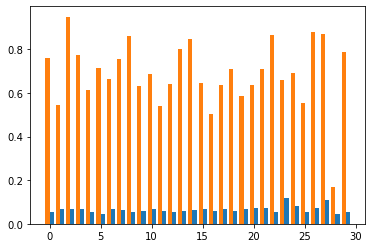

In [30]:
plt.bar(np.arange(len(death_rates_old[high_spis]))+0.2, death_rates_old[high_spis], width=0.4)
plt.bar(np.arange(len(death_rates_old[high_spis]))-0.2, veh_reg_rates[high_spis], width=0.4)
plt.show()

In [23]:
# get all countries in main dataset
countries2 = []
for country in df["location_name"].unique():
    if country not in ["South Asia"]:
        countries2.append(country)

print(len(countries2))
print(countries2)

672
['Global', 'Southeast Asia, East Asia, and Oceania', 'East Asia', 'China', "Democratic People's Republic of Korea", 'Taiwan (Province of China)', 'Southeast Asia', 'Cambodia', 'Indonesia', "Lao People's Democratic Republic", 'Malaysia', 'Maldives', 'Myanmar', 'Philippines', 'Sri Lanka', 'Thailand', 'Timor-Leste', 'Viet Nam', 'Oceania', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Vanuatu', 'Central Europe, Eastern Europe, and Central Asia', 'Central Asia', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Mongolia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Central Europe', 'Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Hungary', 'North Macedonia', 'Montenegro', 'Poland', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Eastern Europe', 'Belarus', 'Estonia', 'Latvia', 'Lithuania', 'Republic of Moldova', 'Russian Federation', 'Ukraine', 'High-income', 'Hig

In [31]:
death_rates_young2 = np.zeros(len(countries2))
death_rates_old2 = np.zeros(len(countries2))

for i, country in enumerate(countries2):
    
    death_rates_young2[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 1) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])
    
    death_rates_old2[i] = float(df[(df["location_name"] == country) & (df["age_group_id"] == 199) &
               (df["sex_name"] == "both") & (df["year_id"] == 2019)]["val"])

In [32]:
# https://en.wikipedia.org/wiki/Social_Progress_Index
# Social Progress Index

low_spis = np.zeros(30, dtype=int)
low_spis[0] = np.where(np.array(countries2) == "South Sudan")[0]
low_spis[1] = np.where(np.array(countries2) == "Chad")[0]
low_spis[2] = np.where(np.array(countries2) == "Central African Republic")[0]
low_spis[3] = np.where(np.array(countries2) == "Eritrea")[0]
low_spis[4] = np.where(np.array(countries2) == "Somalia")[0]
low_spis[5] = np.where(np.array(countries2) == "Burundi")[0]
low_spis[6] = np.where(np.array(countries2) == "Niger")[0]
low_spis[7] = np.where(np.array(countries2) == "Democratic Republic of the Congo")[0]
low_spis[8] = np.where(np.array(countries2) == "Afghanistan")[0]
low_spis[9] = np.where(np.array(countries2) == "Guinea")[0]
low_spis[10] = np.where(np.array(countries2) == "Papua New Guinea")[0]
low_spis[11] = np.where(np.array(countries2) == "Guinea-Bissau")[0]
low_spis[12] = np.where(np.array(countries2) == "Angola")[0]
low_spis[13] = np.where(np.array(countries2) == "Mali")[0]
low_spis[14] = np.where(np.array(countries2) == "Congo")[0]
low_spis[15] = np.where(np.array(countries2) == "Madagascar")[0]
low_spis[16] = np.where(np.array(countries2) == "Sudan")[0]
low_spis[17] = np.where(np.array(countries2) == "Djibouti")[0]
low_spis[18] = np.where(np.array(countries2) == "Ethiopia")[0]
low_spis[19] = np.where(np.array(countries2) == "Haiti")[0]
low_spis[20] = np.where(np.array(countries2) == "Mauritania")[0]
low_spis[21] = np.where(np.array(countries2) == "Mozambique")[0]
low_spis[22] = np.where(np.array(countries2) == "Pakistan")[0]
low_spis[23] = np.where(np.array(countries2) == "Burkina Faso")[0]
low_spis[24] = np.where(np.array(countries2) == "Democratic People's Republic of Korea")[0]
low_spis[25] = np.where(np.array(countries2) == "Equatorial Guinea")[0]
low_spis[26] = np.where(np.array(countries2) == "Cameroon")[0]
low_spis[27] = np.where(np.array(countries2) == "Nigeria")[0]
low_spis[28] = np.where(np.array(countries2) == "Liberia")[0]
low_spis[29] = np.where(np.array(countries2) == "Sierra Leone")[0]

print(low_spis)

[236 197 163 172 181 169 206 165 154 201  23 202 162 204 164 175 239 171
 173 111 205 178 159 194   4 166 195 207 203 210]


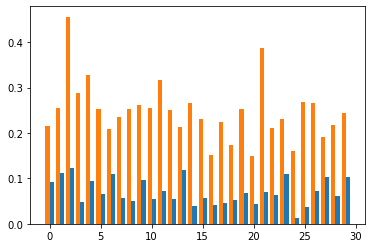

In [35]:
plt.bar(np.arange(len(death_rates_young2[low_spis]))+0.2, death_rates_young2[low_spis], width=0.4)
plt.bar(np.arange(len(death_rates_old2[low_spis]))-0.2, death_rates_old2[low_spis], width=0.4)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fe657e653a0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fe65dcfdac0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fe65db641f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fe65db64580>}

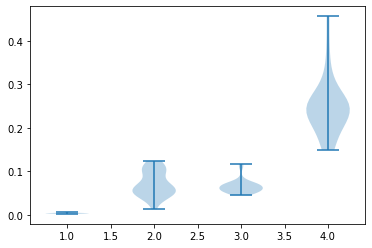

In [38]:
plt.violinplot((death_rates_young[high_spis], 
                death_rates_young2[low_spis],
                death_rates_old[high_spis], 
                death_rates_old2[low_spis]),
              points=30)